In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from reconstruction import Model
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import synthesizer
from torch import optim
from torch.utils.tensorboard import SummaryWriter

2024-04-02 14:58:49.420471: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 14:58:49.589736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 14:58:50.364056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
m = Model('./lisa.webp', device=device)

0c00512ad92247c83718ebebbb039c26


In [14]:
epochs = 1
I = torch.rand((1, 3, m.dimensions[0], m.dimensions[1])).to(device)
#I_original = I.clone()
optimizer = optim.LBFGS([I.requires_grad_(True)], lr=1)
writer = SummaryWriter('./logs')

r = 0
while r < epochs:
    def closure():
        optimizer.zero_grad()
        m(I)
        loss = m.loss()
        loss.backward()
        print(I.grad)
        return loss
    optimizer.step(closure)
    for name, param in m.named_parameters():
        print(name)
        writer.add_histogram(name + '_grad', param.grad, global_step=0)

    r += 1
    print(f'\rRun {r}: Loss {m.loss().item()}', end='')

print()

None
model.0.weight


NotImplementedError: Got <class 'NoneType'>, but numpy array, torch tensor, or caffe2 blob name are expected.

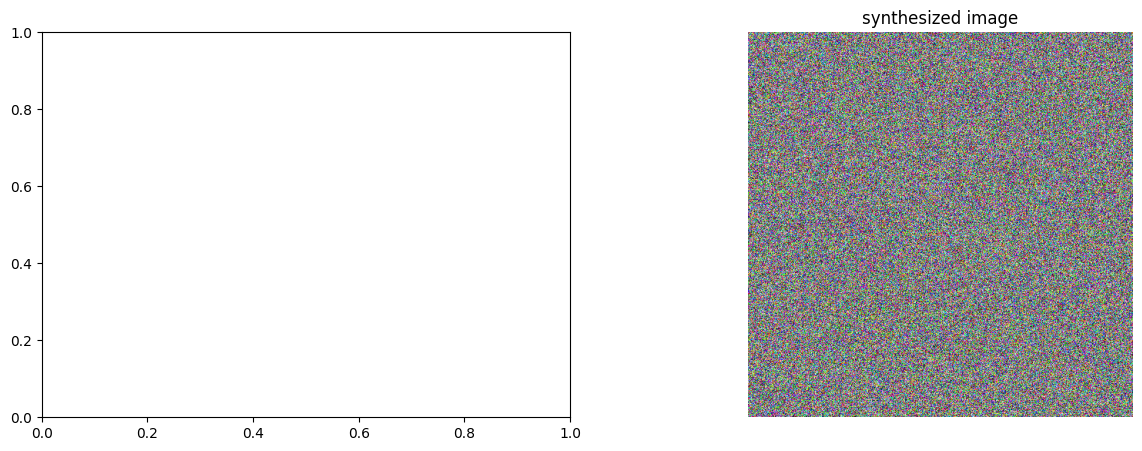

In [14]:
img = np.clip(I.detach().cpu().squeeze(0).numpy().transpose(1, 2, 0), 0, 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#ax1.imshow(m.)
#ax1.axis('off')
#ax1.set_title('original image')
ax2.imshow(img)
ax2.axis('off')
ax2.set_title('synthesized image')
plt.savefig('oh-man.png')
plt.show()